In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor, )
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from notebooks.utils import METRIC_LOGGER, create_attribute_mapping, regression_train_model


%matplotlib inline

# Установим тип графиков
sns.set(style="ticks")

# Для лучшего качество графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Установим ширину экрана для отчета
pd.set_option("display.width", 80)

https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data

In [180]:
data = pd.read_csv('../data/datasets_588154_1063538_Wellbeing_and_lifestyle_data.csv')
print(f'Dataframe is {data.shape}')
data.head()

Dataframe is (12756, 23)


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female


In [181]:
data.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'DAILY_MEDITATION', 'AGE', 'GENDER'],
      dtype='object')

In [182]:
data.dtypes

Timestamp            object
FRUITS_VEGGIES        int64
DAILY_STRESS         object
PLACES_VISITED        int64
CORE_CIRCLE           int64
SUPPORTING_OTHERS     int64
SOCIAL_NETWORK        int64
ACHIEVEMENT           int64
DONATION              int64
BMI_RANGE             int64
TODO_COMPLETED        int64
FLOW                  int64
DAILY_STEPS           int64
LIVE_VISION           int64
SLEEP_HOURS           int64
LOST_VACATION         int64
DAILY_SHOUTING        int64
SUFFICIENT_INCOME     int64
PERSONAL_AWARDS       int64
TIME_FOR_PASSION      int64
DAILY_MEDITATION      int64
AGE                  object
GENDER               object
dtype: object

In [183]:
data = data.drop(data[data.DAILY_STRESS == '1/1/00'].index)
data.DAILY_STRESS = pd.to_numeric(data.DAILY_STRESS)
data.drop([
    'Timestamp',
    # 'DAILY_STRESS',
    # 'AGE',
    # 'GENDER',
    # 'DAILY_MEDITATION',
    # 'LOST_VACATION',
    # 'DAILY_SHOUTING',
    # 'BMI_RANGE',
    # 'SUPPORTING_OTHERS',
    # 'SLEEP_HOURS'
], axis=1, inplace=True)
for col in data:
    print(col, sorted(data[col].unique()))

FRUITS_VEGGIES [0, 1, 2, 3, 4, 5]
DAILY_STRESS [0, 1, 2, 3, 4, 5]
PLACES_VISITED [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
CORE_CIRCLE [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SUPPORTING_OTHERS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SOCIAL_NETWORK [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ACHIEVEMENT [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DONATION [0, 1, 2, 3, 4, 5]
BMI_RANGE [1, 2]
TODO_COMPLETED [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
FLOW [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_STEPS [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
LIVE_VISION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SLEEP_HOURS [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
LOST_VACATION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_SHOUTING [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SUFFICIENT_INCOME [1, 2]
PERSONAL_AWARDS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TIME_FOR_PASSION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_MEDITATION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
AGE ['21 to 35', '36 to 50', '51 or more', 'Less than 20']
GENDER ['Female', 'Male']


In [184]:
for column in data:
    print(column, data[column].isna().sum())

FRUITS_VEGGIES 0
DAILY_STRESS 0
PLACES_VISITED 0
CORE_CIRCLE 0
SUPPORTING_OTHERS 0
SOCIAL_NETWORK 0
ACHIEVEMENT 0
DONATION 0
BMI_RANGE 0
TODO_COMPLETED 0
FLOW 0
DAILY_STEPS 0
LIVE_VISION 0
SLEEP_HOURS 0
LOST_VACATION 0
DAILY_SHOUTING 0
SUFFICIENT_INCOME 0
PERSONAL_AWARDS 0
TIME_FOR_PASSION 0
DAILY_MEDITATION 0
AGE 0
GENDER 0


In [185]:
for col in ['AGE', 'GENDER']:
    data[col] = data[col].map(create_attribute_mapping(data[col]))


In [186]:
for col in data:
    print(col, sorted(data[col].unique()))

FRUITS_VEGGIES [0, 1, 2, 3, 4, 5]
DAILY_STRESS [0, 1, 2, 3, 4, 5]
PLACES_VISITED [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
CORE_CIRCLE [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SUPPORTING_OTHERS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SOCIAL_NETWORK [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ACHIEVEMENT [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DONATION [0, 1, 2, 3, 4, 5]
BMI_RANGE [1, 2]
TODO_COMPLETED [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
FLOW [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_STEPS [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
LIVE_VISION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SLEEP_HOURS [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
LOST_VACATION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_SHOUTING [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SUFFICIENT_INCOME [1, 2]
PERSONAL_AWARDS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TIME_FOR_PASSION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DAILY_MEDITATION [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
AGE [0, 1, 2, 3]
GENDER [0, 1]


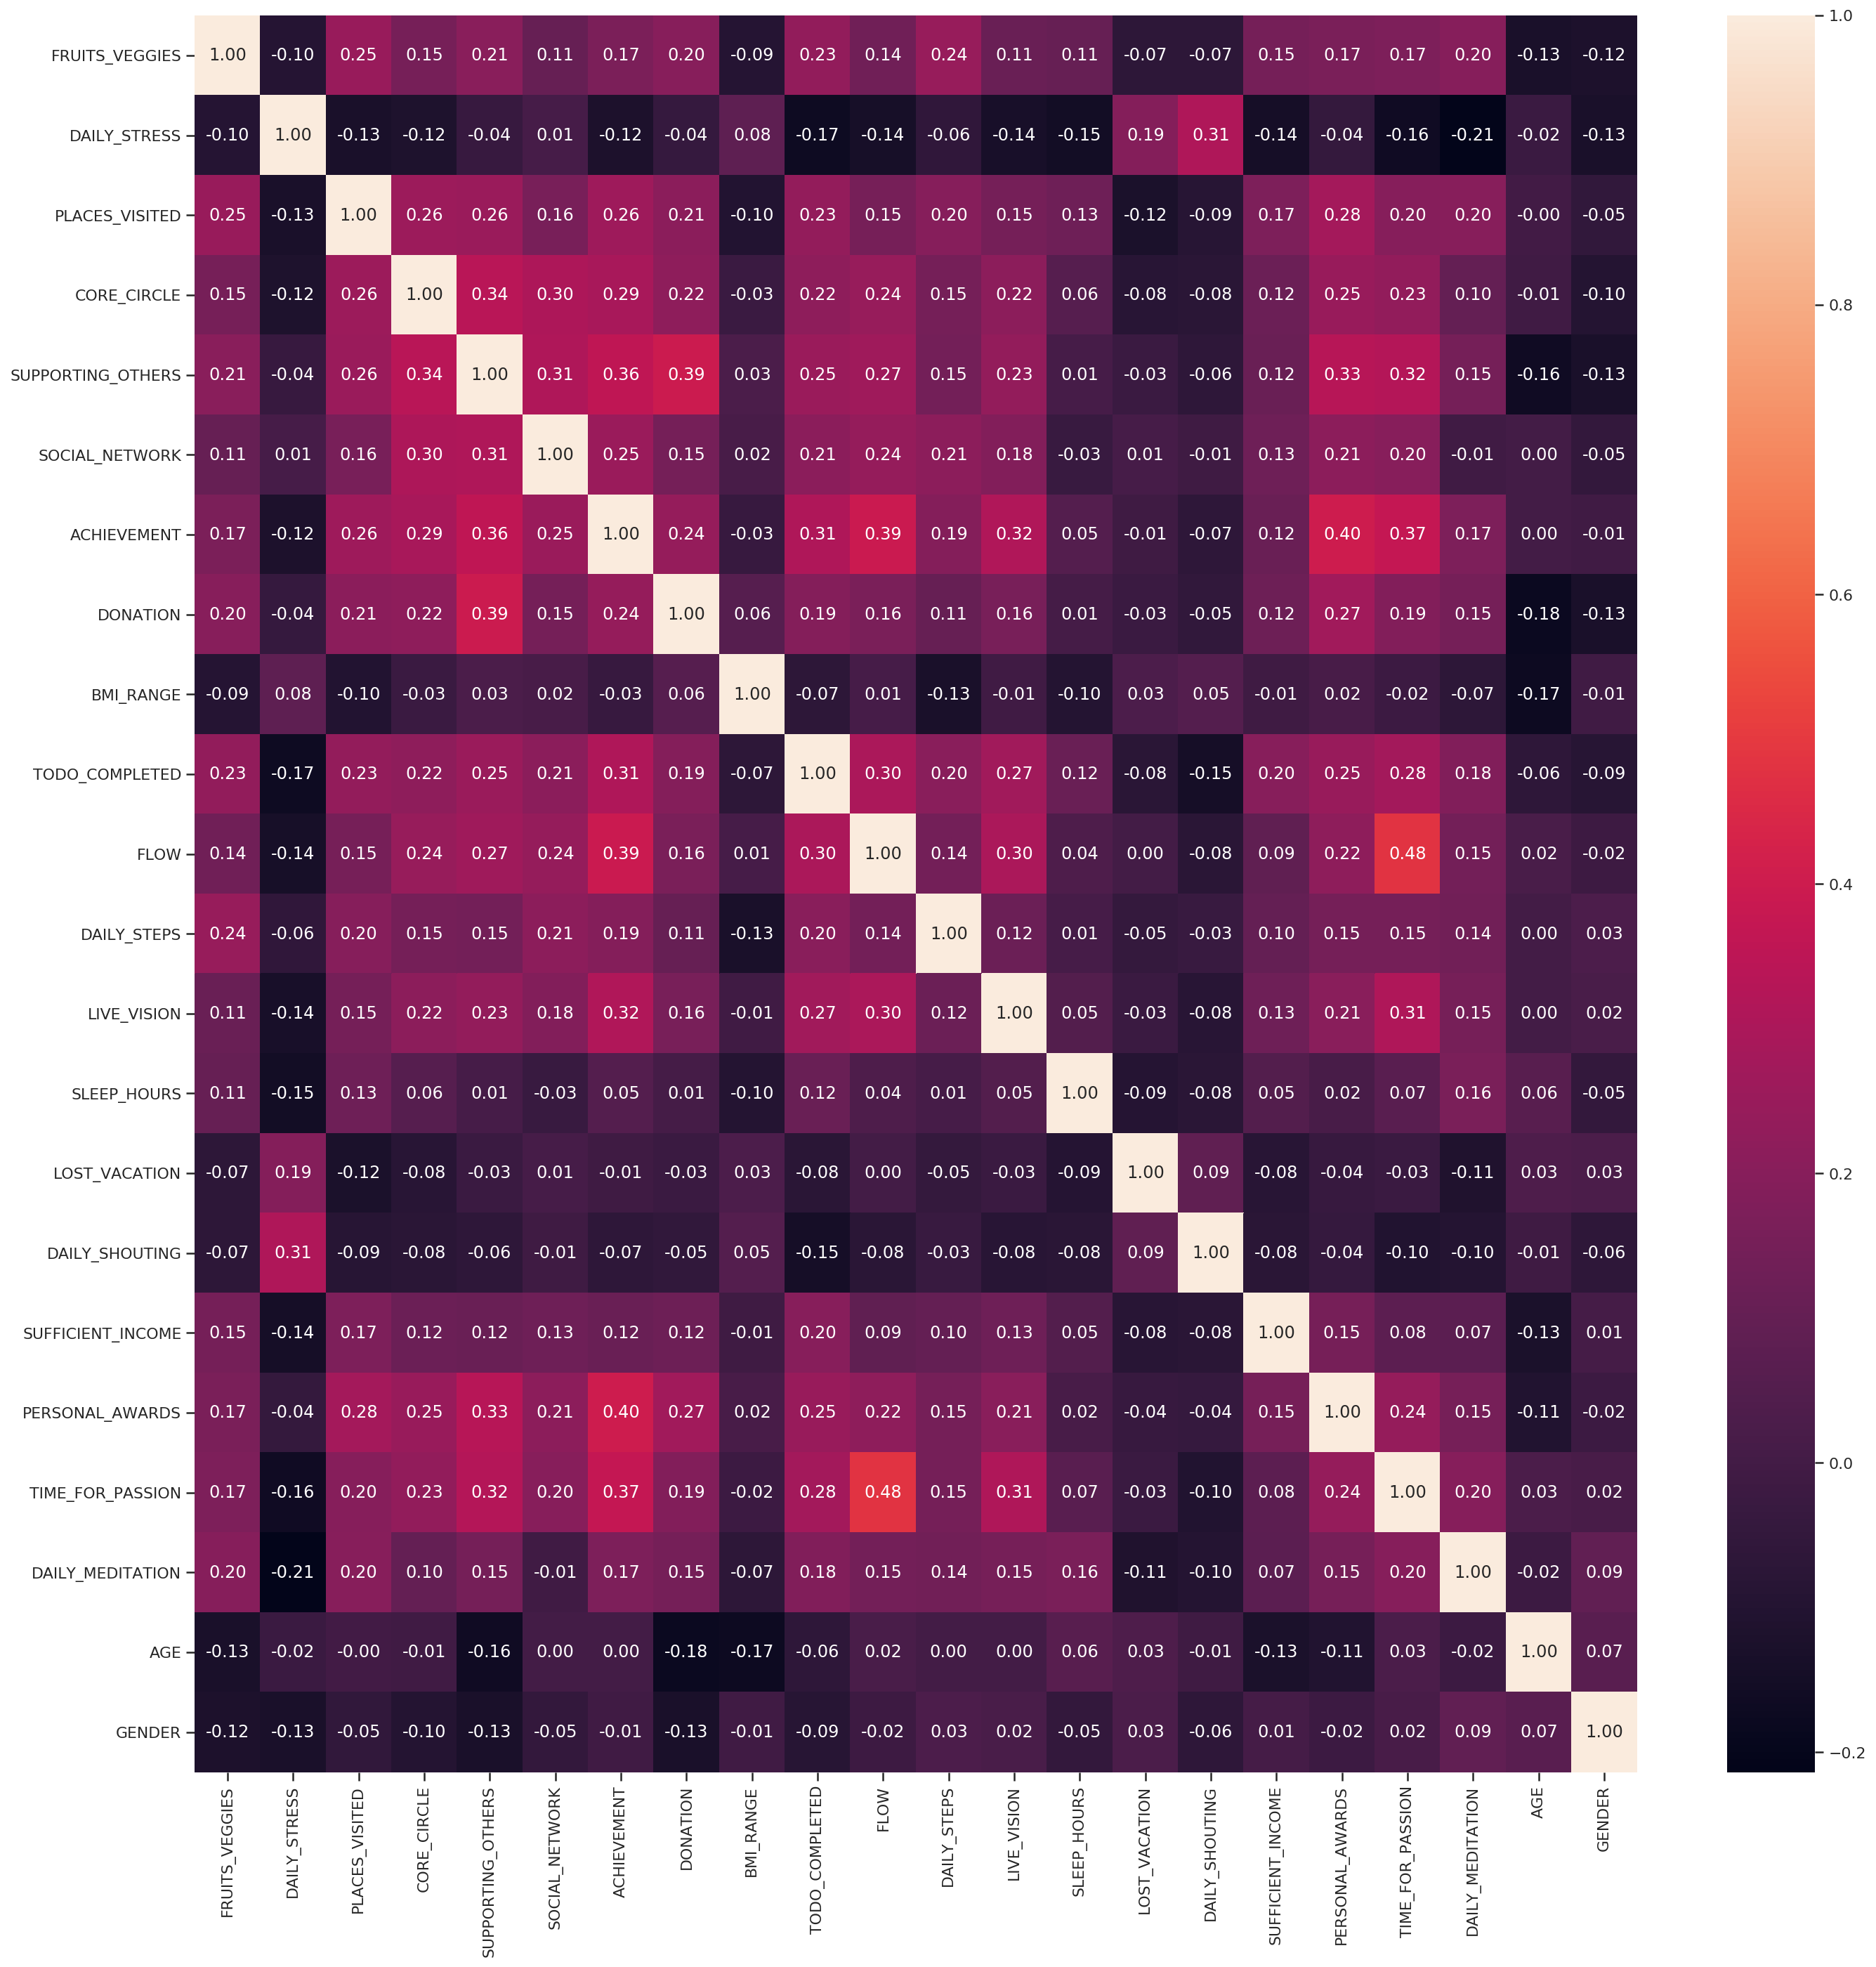

In [187]:
_, ax = plt.subplots(figsize=(23,23))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

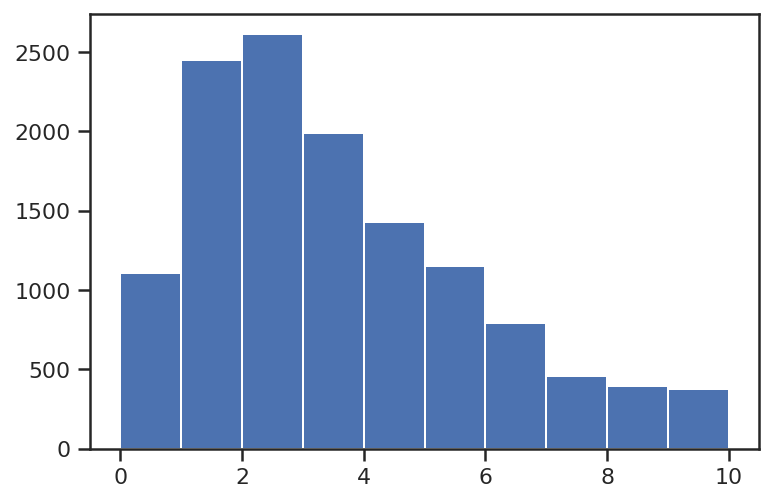

In [188]:
plt.hist(data['FLOW'])
plt.show()


### Разделим выборку!


In [189]:
train, test = train_test_split(data, test_size=0.8)
assert data.shape[0] == train.shape[0] + test.shape[0]

In [190]:
classification_parameters = [
    'ACHIEVEMENT',
    'TIME_FOR_PASSION',
    # 'TODO_COMPLETED',
    # 'LIVE_VISION',
    # 'SOCIAL_NETWORK',
]

In [191]:
x_train = train[classification_parameters]
x_test = test[classification_parameters]
y_train = train['FLOW']
y_test = test['FLOW']

In [192]:
regression_models = {
    'LR': LinearRegression(),
    'KNN_5':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR(),
    'Tree':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'GB':GradientBoostingRegressor()
}

In [193]:
for model_name, model in regression_models.items():
    regression_train_model(x_train, y_train, x_test, y_test, model_name, model, METRIC_LOGGER)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=1.525, MSE=3.921, R2=0.272
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=1.676, MSE=4.703, R2=0.127
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=1.503, MSE=4.11, R2=0.237
*****************************************************
*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max

In [194]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [195]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(x_train, y_train)

CPU times: user 9.56 s, sys: 91.6 ms, total: 9.65 s
Wall time: 6.29 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [196]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=201, p=2,
                    weights='uniform')

In [197]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 201}

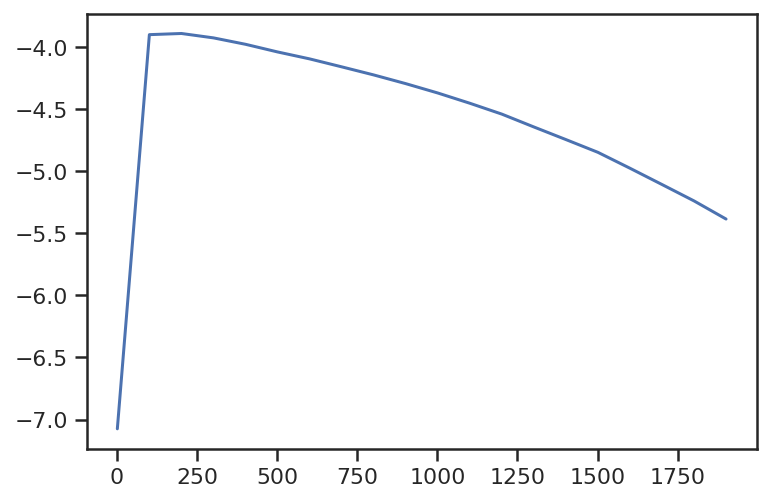

In [198]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

In [199]:
regr_models_grid = {'KNN_801':regr_gs.best_estimator_}

In [200]:
for model_name, model in regr_models_grid.items():
    regression_train_model(x_train, y_train, x_test, y_test, model_name, model, METRIC_LOGGER)

*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=201, p=2,
                    weights='uniform')

MAE=1.52, MSE=3.922, R2=0.272
*****************************************************


In [201]:
# Метрики качества модели
regr_metrics = METRIC_LOGGER.df['metric'].unique()
regr_metrics


array(['MAE', 'MSE', 'R2'], dtype=object)

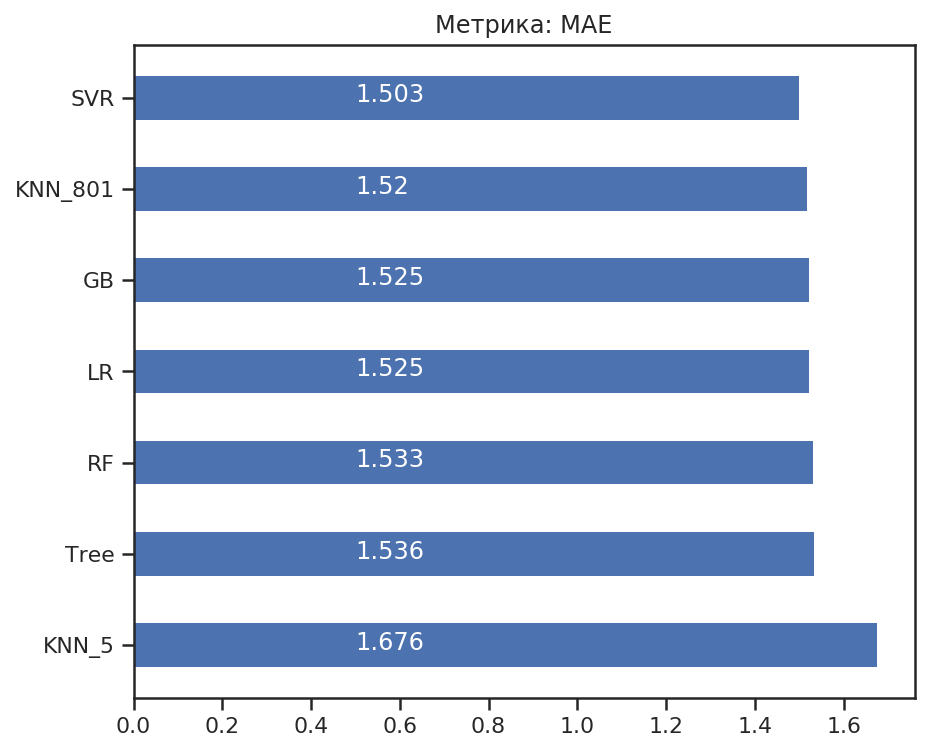

In [202]:
METRIC_LOGGER.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

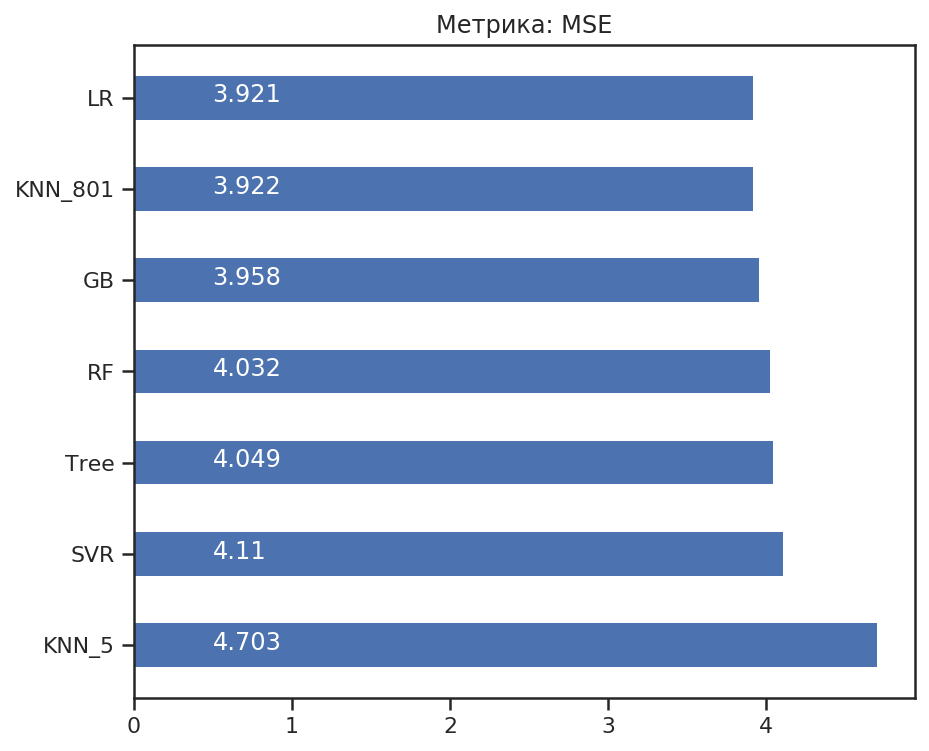

In [203]:
METRIC_LOGGER.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

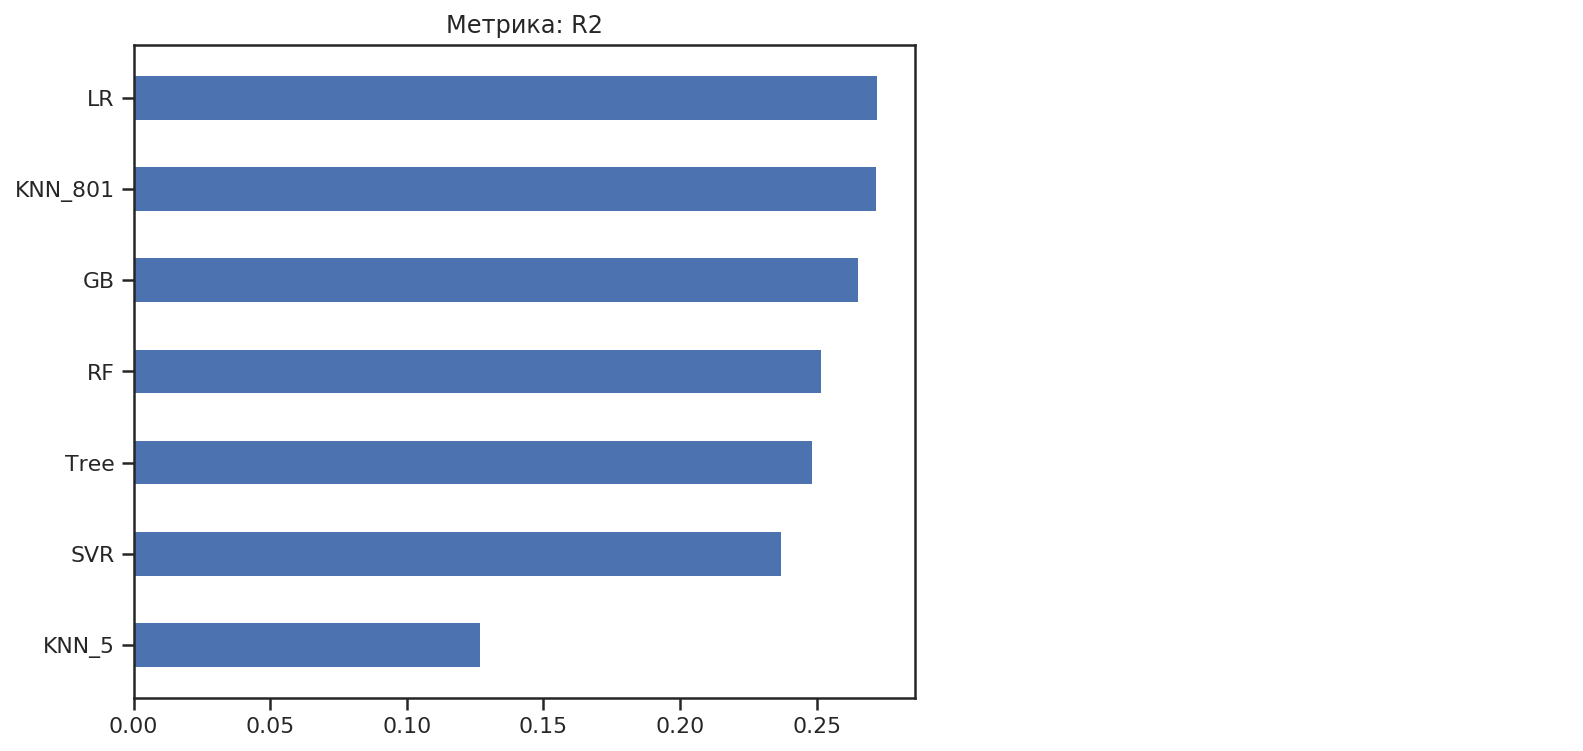

In [204]:
METRIC_LOGGER.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))
